In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'uber_pickups_nyc.csv'  # replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [4]:
# Convert 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract additional time information
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

# Display basic statistics
print(df.describe())


                           Date/Time            Lat            Lon  \
count                         564516  564516.000000  564516.000000   
mean   2014-04-16 17:46:01.296261120      40.740005     -73.976817   
min              2014-04-01 00:00:00      40.072900     -74.773300   
25%              2014-04-08 16:27:00      40.722500     -73.997700   
50%              2014-04-16 19:19:00      40.742500     -73.984800   
75%              2014-04-24 22:14:00      40.760700     -73.970000   
max              2014-04-30 23:59:00      42.116600     -72.066600   
std                              NaN       0.036083       0.050426   

                 Day           Hour     DayOfWeek  
count  564516.000000  564516.000000  564516.00000  
mean       16.117127      14.465043       2.86698  
min         1.000000       0.000000       0.00000  
25%         8.000000      10.000000       1.00000  
50%        16.000000      16.000000       3.00000  
75%        24.000000      19.000000       4.00000  
max  

In [6]:
# Check for missing values
print(df.isnull().sum())


Date/Time    0
Lat          0
Lon          0
Base         0
Day          0
Hour         0
DayOfWeek    0
dtype: int64


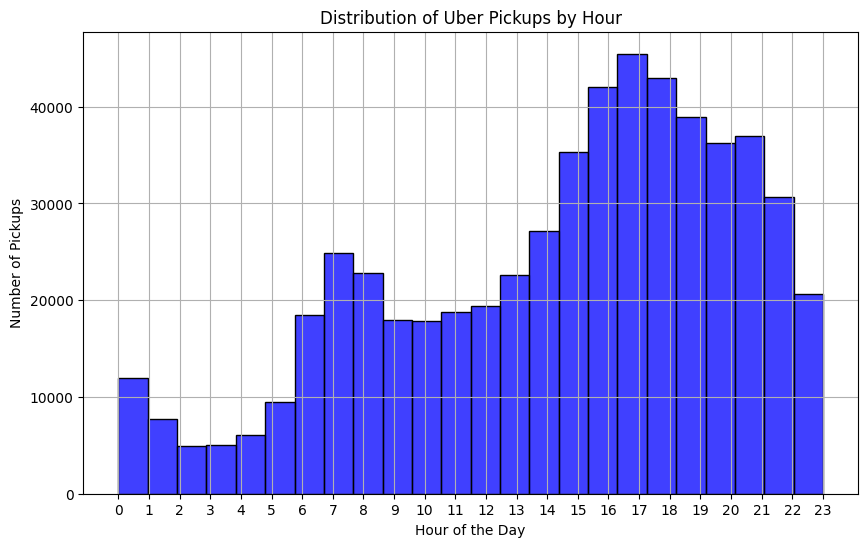

In [7]:
# Visualize the distribution of pickups by hour
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='blue')
plt.title('Distribution of Uber Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

C:\Users\Harsh Bhosale\AppData\Local\Temp\ipykernel_12304\3749547583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='viridis')


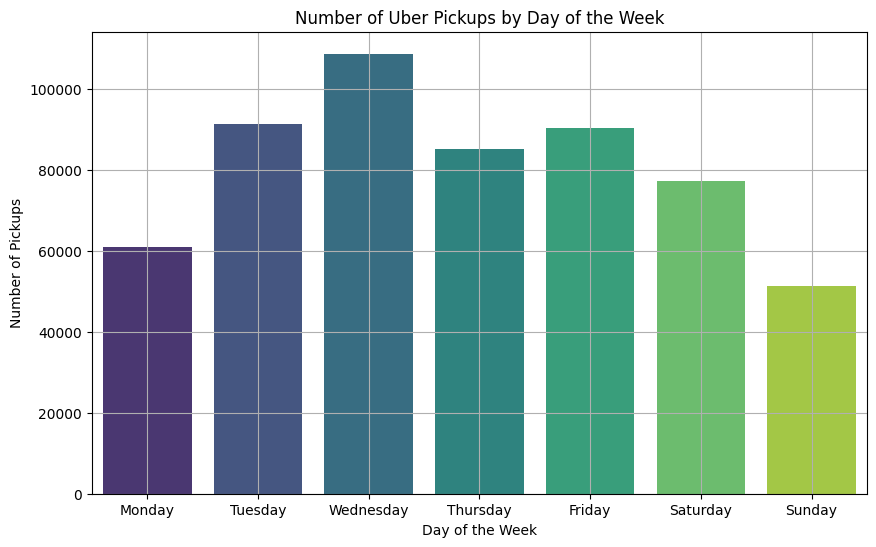

In [8]:
# Visualize the number of pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis')
plt.title('Number of Uber Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

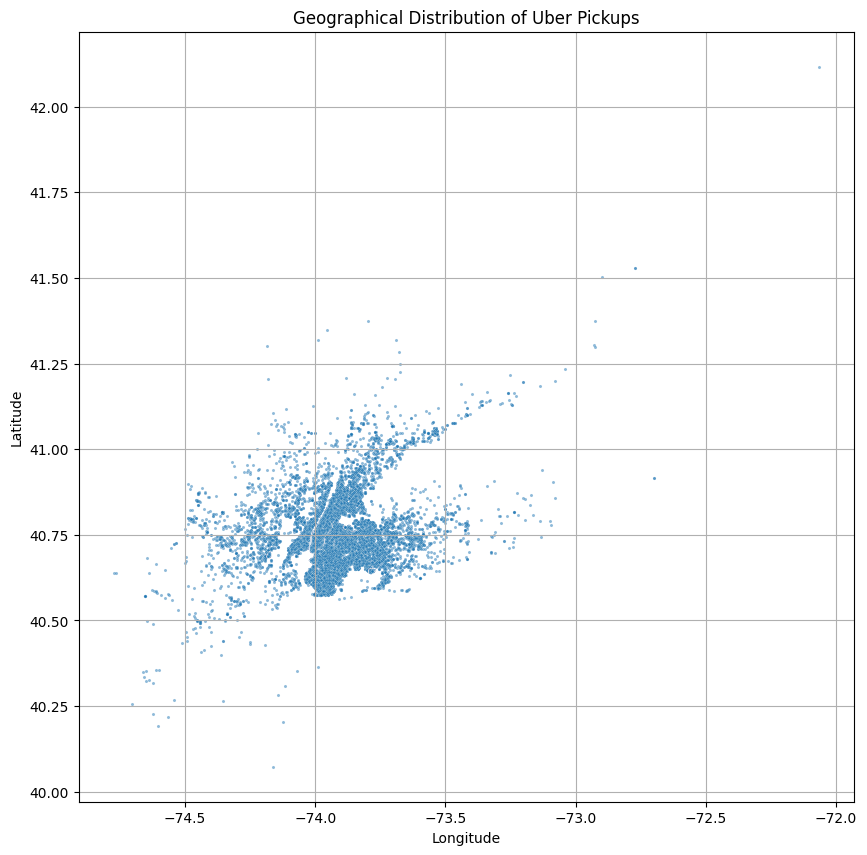

In [9]:
# Analyze pickup locations
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Lon', y='Lat', data=df, alpha=0.5, s=5)
plt.title('Geographical Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

C:\Users\Harsh Bhosale\AppData\Local\Temp\ipykernel_12304\2703973463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Base', data=df, palette='muted', order=df['Base'].value_counts().index)


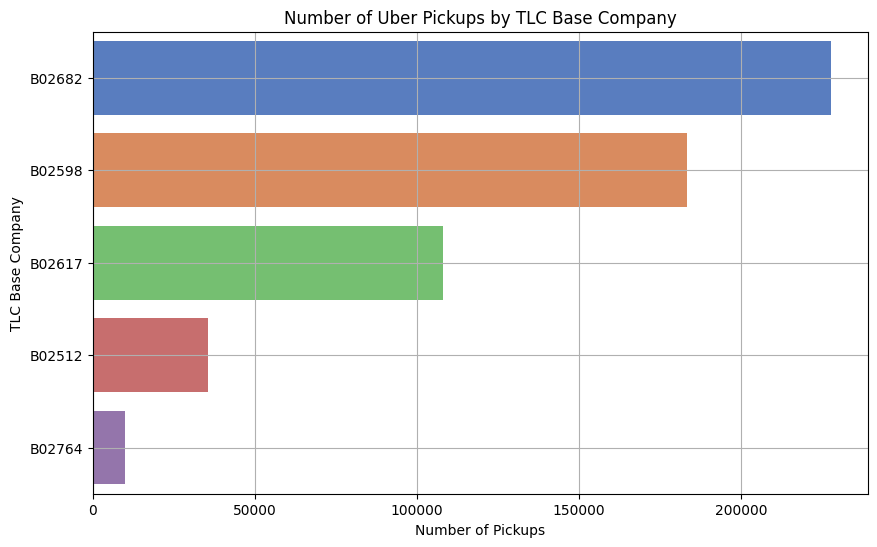

In [10]:

# Analyze pickups by TLC base company code
plt.figure(figsize=(10, 6))
sns.countplot(y='Base', data=df, palette='muted', order=df['Base'].value_counts().index)
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xlabel('Number of Pickups')
plt.ylabel('TLC Base Company')
plt.grid(True)
plt.show()